In [293]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [294]:
def get_column(data, index):
    result = []
    for ele in data:
        result.append(ele[index])
    return result

In [295]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter = ",", skip_header = 1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index=  3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    Y = sales_data
    return X, Y

Câu 1

In [296]:
X, Y = prepare_data("advertising.csv")
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(Y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


In [297]:
def initialize_params():
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)
    b = 0
    w1, w2, w3 = 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344
    return w1, w2, w3, b

In [298]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1*w1 + x2*w2 + x3*w3 + b
    return result

In [299]:
def implement_linear_regression(X_data = X, y_data = Y, epoch_max = 50, lr = 1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            #Get samples
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            #Compute predict
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #Compute Loss MSE
            loss = compute_mse(y, y_hat)

            #Compute gradient wi, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            #Update weights, bias
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)
    return (w1, w2, w3, b, losses)

Câu 2

In [300]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


Câu 3

In [301]:
def compute_mse(y, y_hat):
    return (y-y_hat)**2
l = compute_mse(y_hat = 1, y = 0.5)
print(l)

0.25


Câu 4

In [302]:
def compute_gradient_wi(x, y, y_hat):
    return 2*x*(y_hat-y)
g_wi = compute_gradient_wi(x=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


Câu 5

In [303]:
def compute_gradient_b(y, y_hat):
    return 2*(y_hat-y)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


Câu 6

In [304]:
def update_weight_wi(w, dl_dw, lr):
    return (w - lr*dl_dw)
after_wi = update_weight_wi(w=1.0, dl_dw=-0.5, lr = 1e-5)
print(after_wi)

1.000005


Câu 7

In [305]:
def update_weight_b(b, dl_db, lr):
    return (b - lr*dl_db)
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


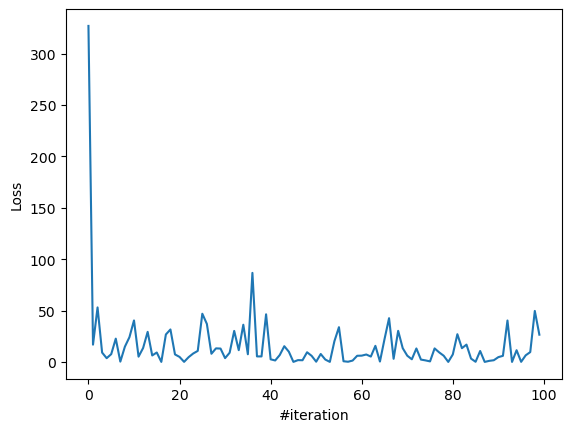

In [306]:
w1, w2, w3, b, losses = implement_linear_regression()
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

Câu 8

In [307]:
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


Câu 9

In [308]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data("advertising.csv")
(w1,w2,w3,b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f" sales is {sales}")

 sales is 8.176413319549823


In [309]:
def compute_mae(y, y_hat):
    return abs(y-y_hat)

Câu 10

In [310]:
l = compute_mae(y_hat=1, y=0.5)
print(l)

0.5


Câu 11

In [311]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=1000, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            #Get samples
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            #Compute predict
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #Compute Loss MSE
            loss = compute_mse(y, y_hat)
            loss_total += loss

            #Compute gradient wi, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        #Update weights, bias
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

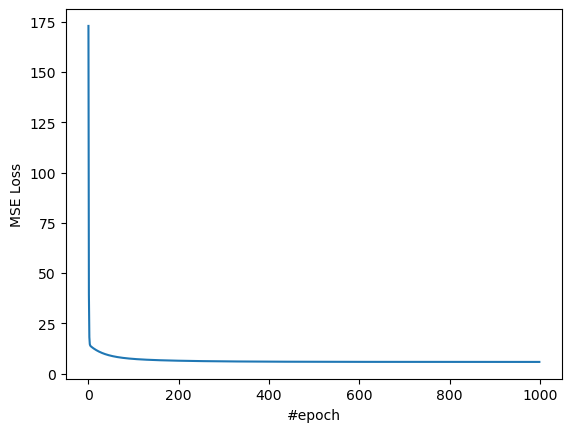

In [312]:
X, y = prepare_data("advertising.csv")
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [313]:
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


Câu 12

In [314]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X,y
X, y = prepare_data("advertising.csv")

In [315]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # comment this line for real application
    return [0,-0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [316]:
def predict(X_features, weights):
    result = 0
    for i in range(len(X_features)):
        result += (X_features[i])*weights[i]
    return result

In [317]:
def compute_loss(y_hat, y):
    return (y_hat-y)**2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = []
    for ele in X_features:
        dl_dweights.append(2*ele*(y_hat-y))
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    for i in range(len(dl_dweights)):
        weights[i] -= dl_dweights[i] * lr  
    return weights

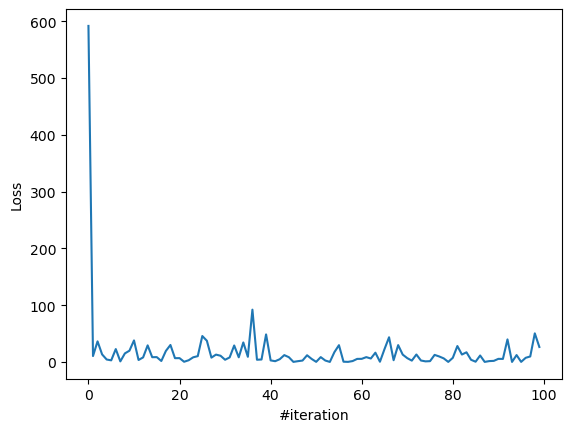

31.339223408109948


In [318]:
def implement_linear_regression(X_features, y_output, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        for i in range(N):
            #Get samples
            features_i = X_features[i]

            y = y_output[i]

            #Compute predict
            y_hat = predict(features_i, weights)

            #Compute Loss
            loss = compute_loss(y_hat, y)
            
            #Compute gradient wi, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            #Update weights
            weights = update_weight(weights, dl_dweights, lr)

            losses.append(loss)

    return weights, losses
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()
print (L [9999])